In [6]:
import sys
sys.path.append('/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/')
import time
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
import random
import os

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from nlcd_user import *

In [10]:
########## making table of non linearity using ks test ##########
genotype=pd.read_csv("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/genotypes_binary_strongest_eqtl.csv",header=0,index_col=0)
expression_data=pd.read_csv("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/expression_reordered_01.csv",index_col=0,header=0)
causal_conf=read_configuration("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/yeastgt_1_wilko1234_ready.txt")
indp_conf=read_configuration("/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts/yeastgt_0_wilko1234_ready.txt")


In [12]:
lineardata=read_data("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/data/Linear500.txt")
sinedata=read_data("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/data/Sine500.txt")
sawdata=read_data("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/data/Saw500.txt")
paradata=read_data("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/data/Para500.txt")

In [13]:
def calculate_ks_yeast(conf):
    total=[]
    for  i in range(len(conf)):
        trio=conf.iloc[i,]
        L_name=trio[0]
        A_name=trio[1]
        B_name=trio[2]
        L=genotype.loc[:,L_name]
        A=expression_data.loc[:,A_name]
        B=expression_data.loc[:,B_name]
        unique_values = np.unique(L)
        indv=[]
        for value in unique_values:
            indices = np.where(L == value)[0]
            A_value = A[indices]    
            indv.extend(lilliefors(A_value))
            #indv.append(stats.shapiro(A_value)[1])
        for value in unique_values:
            indices = np.where(L == value)[0]
            B_value = B[indices]    
            indv.extend(lilliefors(B_value))
        total.append(indv)
    ks_result=pd.DataFrame(total,columns=['A|L = 0 stat','A|L = 0 p','A|L = 1 stat','A|L = 1 p','B|L = 0 stat','B|L = 0 p','B|L = 1 stat','B|L = 1 p',])
    return ks_result

In [14]:
def calculate_ks_simdata(data):
    total=[]
    for  i in range(len(data)):
        L=data[i][0]
        A=data[i][1]
        B=data[i][2]
        unique_values = np.unique(L)
        indv=[]
        for value in unique_values:
            indices = np.where(L == value)[0]
            A_value = A[indices]    
            indv.extend(lilliefors(A_value))
        for value in unique_values:
            indices = np.where(L == value)[0]
            B_value = B[indices]    
            indv.extend(lilliefors(B_value))
        total.append(indv)
    ks_result=pd.DataFrame(total,columns=['A|L = 0 stat','A|L = 0 p','A|L = 1 stat','A|L = 1 p','B|L = 0 stat','B|L = 0 p','B|L = 1 stat','B|L = 1 p',])
    return ks_result

In [15]:
def cutoff_plot(ks_result):
    cutoffs=[0,0.01,0.02,0.03,0.05,0.06,0.07,0.08,0.09,0.1]
    A_passed=[]
    B_passed=[]
    both=[]
    for cutoff in cutoffs:
        ks_result['A_passed']= (ks_result['A|L = 0 p']>=cutoff)& (ks_result['A|L = 1 p']>=cutoff)
        ks_result['B_passed']=(ks_result['B|L = 0 p']>=cutoff) & (ks_result['B|L = 1 p']>=cutoff)
        ks_result['both']=ks_result['A_passed'] & ks_result['B_passed']
        A_passed.append(sum(ks_result['A_passed']))
        B_passed.append(sum(ks_result['B_passed']))
        both.append(sum(ks_result['both']))
    finaltable=pd.DataFrame({'cutoffs':cutoffs,'A passed':A_passed,'B_passed':B_passed,'both':both})
    return finaltable

In [8]:
yeasttable_indp=cutoff_plot(calculate_ks_yeast(indp_conf))
yeasttable_causal=cutoff_plot(calculate_ks_yeast(causal_conf))
linear_table=cutoff_plot(calculate_ks_simdata(lineardata))
sine_table=cutoff_plot(calculate_ks_simdata(sinedata))
saw_table=cutoff_plot(calculate_ks_simdata(sawdata))
para_table=cutoff_plot(calculate_ks_simdata(paradata))


In [9]:
para_table

,cutoffs,A passed,B_passed,both
0,0.00,100,100,100
1,0.01,98,14,14
2,0.02,97,13,13
3,0.03,97,13,13
4,0.05,93,10,10
5,0.06,93,9,9
6,0.07,92,9,9
7,0.08,88,9,9
8,0.09,87,9,9
9,0.10,85,9,9


In [87]:
ksresult=calculate_ks_simdata(paradata)

In [84]:
simresult=pd.read_csv("./../../../conclude/newmethod/simulation_final/results/journal/2way/SawKRR500s100perm.csv")
simresult_rev=pd.read_csv("./../../../conclude/newmethod/simulation_final/results/journal/2way/SawKRR500s100perm_rev.csv")

Text(0, 0.5, 'p value A -> B')

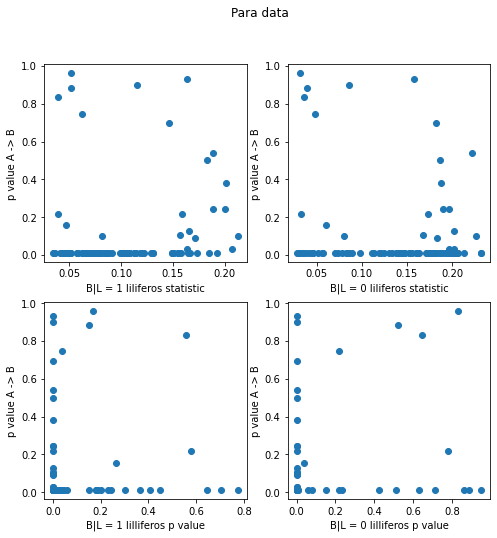

In [91]:
simresult=pd.read_csv("./../../../conclude/newmethod/simulation_final/results/journal/simulation/nlcd/ParaKRR500s100perm.csv")
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle("Para data")
axs[0,0].scatter(ksresult['B|L = 1 stat'],simresult['p_final']  )
axs[0,0].set_xlabel("B|L = 1 liliferos statistic")
axs[0,0].set_ylabel("p value A -> B")
axs[0,1].scatter(ksresult['B|L = 0 stat'],simresult['p_final']  )
axs[0,1].set_xlabel("B|L = 0 liliferos statistic")
axs[0,1].set_ylabel("p value A -> B")
axs[1,0].scatter(ksresult['B|L = 1 p'],simresult['p_final']  )
axs[1,0].set_xlabel("B|L = 1 lilliferos p value")
axs[1,0].set_ylabel("p value A -> B")
axs[1,1].scatter(ksresult['B|L = 0 p'],simresult['p_final']  )
axs[1,1].set_xlabel("B|L = 0 lilliferos p value")
axs[1,1].set_ylabel("p value A -> B")

Text(0, 0.5, 'p value B -> A')

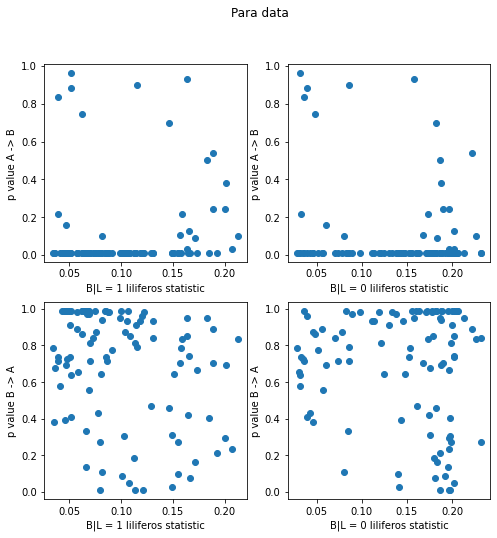

In [89]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle("Para data")
axs[0,0].scatter(ksresult['B|L = 1 stat'],simresult['p_final']  )
axs[0,0].set_xlabel("B|L = 1 liliferos statistic")
axs[0,0].set_ylabel("p value A -> B")
axs[0,1].scatter(ksresult['B|L = 0 stat'],simresult['p_final']  )
axs[0,1].set_xlabel("B|L = 0 liliferos statistic")
axs[0,1].set_ylabel("p value A -> B")
axs[1,0].scatter(ksresult['B|L = 1 stat'],simresult_rev['p_final']  )
axs[1,0].set_xlabel("B|L = 1 liliferos statistic")
axs[1,0].set_ylabel("p value B -> A")
axs[1,1].scatter(ksresult['B|L = 0 stat'],simresult_rev['p_final']  )
axs[1,1].set_xlabel("B|L = 0 liliferos statistic")
axs[1,1].set_ylabel("p value B -> A")

Text(0, 0.5, 'p value B -> A')

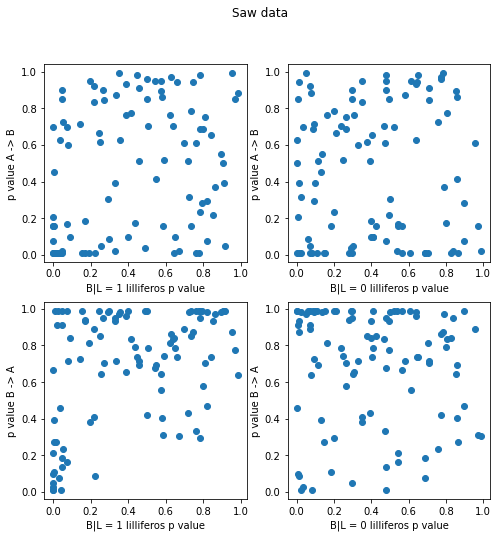

In [86]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(8)
fig.suptitle("Saw data")
axs[0,0].scatter(ksresult['B|L = 1 p'],simresult['p_final']  )
axs[0,0].set_xlabel("B|L = 1 lilliferos p value")
axs[0,0].set_ylabel("p value A -> B")
axs[0,1].scatter(ksresult['B|L = 0 p'],simresult['p_final']  )
axs[0,1].set_xlabel("B|L = 0 lilliferos p value")
axs[0,1].set_ylabel("p value A -> B")
axs[1,0].scatter(ksresult['B|L = 1 p'],simresult_rev['p_final']  )
axs[1,0].set_xlabel("B|L = 1 lilliferos p value")
axs[1,0].set_ylabel("p value B -> A")
axs[1,1].scatter(ksresult['B|L = 0 p'],simresult_rev['p_final']  )
axs[1,1].set_xlabel("B|L = 0 lilliferos p value")
axs[1,1].set_ylabel("p value B -> A")

(0.034172968823640515, 0.7327577137905363)

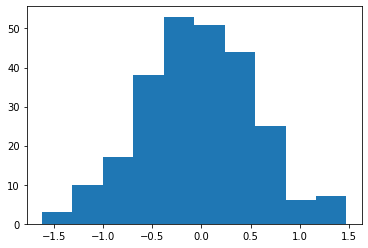

In [67]:
L=data[98][0]
B=data[98][2]
indices = np.where(L == 1)[0]
B_value = B[indices]    
plt.hist(B_value)
lilliefors(B_value)

In [27]:
cutoff=0.05
ks_result['A_passed']= (ks_result['A|L = 0 p']>=cutoff)& (ks_result['A|L = 1 p']>=cutoff)
ks_result['B_passed']=(ks_result['B|L = 0 p']>=cutoff) & (ks_result['B|L = 1 p']>=cutoff)
ks_result['both']=ks_result['A_passed'] & ks_result['B_passed']
ks_result

,A|L = 0 stat,A|L = 0 p,A|L = 1 stat,A|L = 1 p,B|L = 0 stat,B|L = 0 p,B|L = 1 stat,B|L = 1 p,A_passed,B_passed,both
0,0.045654,0.298738,0.041485,0.429066,0.034430,0.740073,0.047951,0.218518,True,True,True
1,0.037439,0.559510,0.042109,0.452736,0.032169,0.785011,0.038768,0.584016,True,True,True
2,0.045189,0.307807,0.028311,0.930696,0.040630,0.471410,0.047280,0.237045,True,True,True
3,0.030870,0.845637,0.029335,0.916590,0.031502,0.823209,0.040291,0.499101,True,True,True
4,0.042043,0.379746,0.036951,0.660653,0.046476,0.230630,0.030095,0.907688,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
95,0.033275,0.796276,0.046115,0.244485,0.035470,0.713993,0.027761,0.932273,True,True,True
96,0.059117,0.069477,0.029512,0.859862,0.037290,0.674429,0.030347,0.829294,True,True,True
97,0.031717,0.801256,0.057914,0.070739,0.041274,0.408108,0.044819,0.357715,True,True,True
98,0.025979,0.974081,0.034899,0.674607,0.026125,0.972453,0.034302,0.701023,True,True,True


In [84]:
simresult=pd.read_csv("./../../../conclude/newmethod/simulation_final/results/journal/2way/LinearKRR500s100perm.csv")

In [85]:
simresult_rev=pd.read_csv("./../../../conclude/newmethod/simulation_final/results/journal/2way/LinearKRR500s100perm_rev.csv")

In [15]:
lilliefors(x,dist='norm') # by default the distribution is normal 

(0.057469863834976875, 0.575176811301954)

(array([ 8.,  6.,  7.,  7.,  5.,  7.,  7.,  3., 13., 37.]),
 array([0.02940117, 0.12646105, 0.22352094, 0.32058082, 0.4176407 ,
        0.51470059, 0.61176047, 0.70882035, 0.80588023, 0.90294012,
        1.        ]),
 <BarContainer object of 10 artists>)

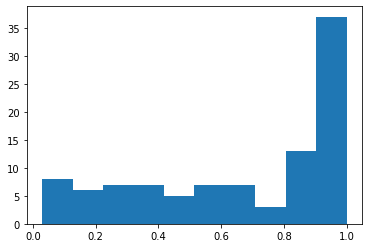

In [87]:
plt.hist(ks_result['B|L = 1 stat'])

## Calculating the number of trios that pass where liliferos test <0.05 and p value < 0.05 for the variable A

In [17]:
#make the confusion matrix 
#linear data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(lineardata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/LinearKRR500s100perm.csv")
df['A_final']=np.minimum(df['A|L = 0 p'],df['A|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['A_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['A_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['A_final']>=0.05)))


[[23  0]
 [72  5]]
p value of A->B < 0.05 and liliferos test < 0.05 =  5
p value of A->B < 0.05 and liliferos test >= than 0.05 =  72
p value of A->B >= 0.05 and liliferos test < than 0.05 =  0
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  23


In [18]:
#make the confusion matrix 
#sine data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(sinedata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/SineKRR500s100perm.csv")
df['A_final']=np.minimum(df['A|L = 0 p'],df['A|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['A_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['A_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['A_final']>=0.05)))


[[58  6]
 [35  1]]
p value of A->B < 0.05 and liliferos test < 0.05 =  1
p value of A->B < 0.05 and liliferos test >= than 0.05 =  35
p value of A->B >= 0.05 and liliferos test < than 0.05 =  6
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  58


In [19]:
#make the confusion matrix 
#saw data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(sawdata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/SawKRR500s100perm.csv")
df['A_final']=np.minimum(df['A|L = 0 p'],df['A|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['A_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['A_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['A_final']>=0.05)))


[[72  7]
 [20  1]]
p value of A->B < 0.05 and liliferos test < 0.05 =  1
p value of A->B < 0.05 and liliferos test >= than 0.05 =  20
p value of A->B >= 0.05 and liliferos test < than 0.05 =  7
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  72


In [20]:
#make the confusion matrix 
#parabola data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(lineardata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/ParaKRR500s100perm.csv")
df['A_final']=np.minimum(df['A|L = 0 p'],df['A|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['A_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['A_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['A_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['A_final']>=0.05)))


[[19  1]
 [76  4]]
p value of A->B < 0.05 and liliferos test < 0.05 =  4
p value of A->B < 0.05 and liliferos test >= than 0.05 =  76
p value of A->B >= 0.05 and liliferos test < than 0.05 =  1
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  19


## Calculating the number of trios that pass where liliferos test <0.05 and p value < 0.05 for the variable B

In [30]:
#make the confusion matrix 
#linear data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(lineardata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/LinearKRR500s100perm.csv")
df['B_final']=np.minimum(df['B|L = 0 p'],df['B|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['B_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['B_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['B_final']>=0.05)))


[[22  1]
 [73  4]]
p value of A->B < 0.05 and liliferos test < 0.05 =  4
p value of A->B < 0.05 and liliferos test >= than 0.05 =  73
p value of A->B >= 0.05 and liliferos test < than 0.05 =  1
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  22


In [31]:
#make the confusion matrix 
#sine data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(sinedata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/SineKRR500s100perm.csv")
df['B_final']=np.minimum(df['B|L = 0 p'],df['B|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['B_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['B_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['B_final']>=0.05)))


[[37 27]
 [21 15]]
p value of A->B < 0.05 and liliferos test < 0.05 =  15
p value of A->B < 0.05 and liliferos test >= than 0.05 =  21
p value of A->B >= 0.05 and liliferos test < than 0.05 =  27
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  37


In [34]:
#make the confusion matrix 
#saw data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(sawdata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/SawKRR500s100perm.csv")
df['B_final']=np.minimum(df['B|L = 0 p'],df['B|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['B_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['B_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['B_final']>=0.05)))


[[65 14]
 [ 7 14]]
p value of A->B < 0.05 and liliferos test < 0.05 =  14
p value of A->B < 0.05 and liliferos test >= than 0.05 =  7
p value of A->B >= 0.05 and liliferos test < than 0.05 =  14
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  65


In [33]:
#make the confusion matrix 
#parabola data 
from sklearn.metrics import confusion_matrix
df=calculate_ks_simdata(lineardata)
df_result=pd.read_csv("/data/users/cs20s037/CITNonLinear/conclude/newmethod/simulation_final/results/journal/simulation/nlcd/ParaKRR500s100perm.csv")
df['B_final']=np.minimum(df['B|L = 0 p'],df['B|L = 1 p'])
print(confusion_matrix(df_result['p_final']<0.05,df['B_final']<0.05))
print('p value of A->B < 0.05 and liliferos test < 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']<0.05)))
print('p value of A->B < 0.05 and liliferos test >= than 0.05 = ',sum((df_result['p_final']<0.05) & (df['B_final']>=0.05)))
print('p value of A->B >= 0.05 and liliferos test < than 0.05 = ' ,sum((df_result['p_final']>=0.05) & (df['B_final']<0.05)))
print('p value of A->B >= 0.05 and liliferos test  >= 0.05 = ',sum((df_result['p_final']>=0.05) & (df['B_final']>=0.05)))


[[20  0]
 [75  5]]
p value of A->B < 0.05 and liliferos test < 0.05 =  5
p value of A->B < 0.05 and liliferos test >= than 0.05 =  75
p value of A->B >= 0.05 and liliferos test < than 0.05 =  0
p value of A->B >= 0.05 and liliferos test  >= 0.05 =  20


,A|L = 0 stat,A|L = 0 p,A|L = 1 stat,A|L = 1 p,B|L = 0 stat,B|L = 0 p,B|L = 1 stat,B|L = 1 p,B_final
0,0.045654,0.298738,0.041485,0.429066,0.034430,0.740073,0.047951,0.218518,0.740073
1,0.037439,0.559510,0.042109,0.452736,0.032169,0.785011,0.038768,0.584016,0.785011
2,0.045189,0.307807,0.028311,0.930696,0.040630,0.471410,0.047280,0.237045,0.471410
3,0.030870,0.845637,0.029335,0.916590,0.031502,0.823209,0.040291,0.499101,0.823209
4,0.042043,0.379746,0.036951,0.660653,0.046476,0.230630,0.030095,0.907688,0.907688
...,...,...,...,...,...,...,...,...,...
95,0.033275,0.796276,0.046115,0.244485,0.035470,0.713993,0.027761,0.932273,0.932273
96,0.059117,0.069477,0.029512,0.859862,0.037290,0.674429,0.030347,0.829294,0.829294
97,0.031717,0.801256,0.057914,0.070739,0.041274,0.408108,0.044819,0.357715,0.408108
98,0.025979,0.974081,0.034899,0.674607,0.026125,0.972453,0.034302,0.701023,0.972453


In [12]:
df

,A|L = 0 stat,A|L = 0 p,A|L = 1 stat,A|L = 1 p,B|L = 0 stat,B|L = 0 p,B|L = 1 stat,B|L = 1 p,B_passed
0,0.045654,0.298738,0.041485,0.429066,0.034430,0.740073,0.047951,0.218518,True
1,0.037439,0.559510,0.042109,0.452736,0.032169,0.785011,0.038768,0.584016,True
2,0.045189,0.307807,0.028311,0.930696,0.040630,0.471410,0.047280,0.237045,True
3,0.030870,0.845637,0.029335,0.916590,0.031502,0.823209,0.040291,0.499101,True
4,0.042043,0.379746,0.036951,0.660653,0.046476,0.230630,0.030095,0.907688,True
...,...,...,...,...,...,...,...,...,...
95,0.033275,0.796276,0.046115,0.244485,0.035470,0.713993,0.027761,0.932273,True
96,0.059117,0.069477,0.029512,0.859862,0.037290,0.674429,0.030347,0.829294,True
97,0.031717,0.801256,0.057914,0.070739,0.041274,0.408108,0.044819,0.357715,True
98,0.025979,0.974081,0.034899,0.674607,0.026125,0.972453,0.034302,0.701023,True


The next cells are for the variance calculation barpltots 

In [4]:
commontfs=pd.read_csv('commontfs.csv',header=None)[0].to_list()
df=pd.read_csv('strongest_eqtls_r_3columns.csv',header=0)
df.drop(columns=df.columns[[0,3]], axis=1,  inplace=True)
df.columns=['cis','pmarker']
reqd=df[df['cis'].isin(commontfs)].reset_index()
reqd.drop(columns=reqd.columns[0],axis=1,inplace=True)

In [5]:
## read the genotype ## 
genotype=pd.read_csv("genotypes_binary_strongest_eqtl.csv",header=0,index_col=0)

In [6]:
expression_data=pd.read_csv("expression_reordered_01.csv",index_col=0,header=0)

In [7]:
reqd

,cis,pmarker
0,YBL005W,chrII:216631_A/G
1,YBR083W,chrII:408801_T/C
2,YBR239C,chrII:699675_T/C
3,YCR065W,chrIII:236451_G/A
4,YCR084C,chrIII:262264_T/C
...,...,...
75,YOR363C,chrXV:1023392_T/G
76,YPL038W,chrXVI:481979_C/T
77,YPL133C,chrXVI:310970_A/C
78,YPL248C,chrXVI:81157_G/A


In [ ]:
#calculate the variance for each value of L 
var_list=[]
for i in range(len(reqd)):
    L=genotype.loc[:,reqd.loc[i,'pmarker']]
    A=expression_data.loc[:,reqd.loc[i,'cis']]
    unique_values = np.unique(L)
    variance = []

    for value in unique_values:
        indices = np.where(L == value)[0]
        A_value = A[indices]
        variance.append(np.var(A_value))
    var_list.append(variance)

In [10]:
reqd[['A_0','A_1']]=var_list
reqd['absdifference']=abs((reqd['A_0']-reqd['A_1'])/reqd['A_0'])

In [16]:
cutoffs=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
for i in cutoffs:
    varmore=reqd.loc[reqd['absdifference']>i,]
    causal=read_configuration("yeastgt_1_wilko1234_ready.txt")
    causal=causal.reset_index()
    causal.columns=['id','L','A','B']
    merged_table = pd.merge(varmore,causal, left_on=['cis', 'pmarker'], right_on=['A', 'L'])
    print(len(merged_table))
    np.savetxt("./var_indices/yeast_wilko_var_causal_"+str(i)+".csv",
        merged_table['id'],
        delimiter =", ",
        fmt ='% s')
    indep=read_configuration("yeastgt_0_wilko1234_ready.txt")
    indep=indep.reset_index()
    indep.columns=['id','L','A','B']
    merged_table = pd.merge(varmore,indep, left_on=['cis', 'pmarker'], right_on=['A', 'L'])
    print(len(merged_table))
    np.savetxt("./var_indices/yeast_wilko_var_indep_"+str(i)+".csv",
        merged_table['id'],
        delimiter =", ",
        fmt ='% s')


1234
1234
683
683
673
673
553
553
353
353
239
239
120
120
113
113


In [46]:
sum(reqd['absdifference']>0.125) ## applying the cutoff

40

In [48]:
varmore=reqd.loc[reqd['absdifference']>0.125,]

In [52]:
varmore

,cis,pmarker,A_0,A_1,absdifference
1,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456
2,YBR239C,chrII:699675_T/C,0.138509,0.120256,0.131779
3,YCR065W,chrIII:236451_G/A,0.276058,0.318020,0.152006
5,YDL020C,chrIV:415049_T/C,0.244634,0.202569,0.171952
11,YDR253C,chrIV:1338321_T/G,0.421820,0.350242,0.169687
12,YDR259C,chrIV:975156_A/G,0.270642,0.231700,0.143887
13,YDR310C,chrIV:102617_C/T,0.091314,0.114172,0.250322
14,YDR421W,chrIV:1309620_C/T,0.112286,0.091349,0.186460
15,YDR423C,chrIV:1318030_A/C,0.334302,0.376733,0.126924
16,YDR451C,chrIV:1359411_A/AT,0.084855,0.105236,0.240188


In [49]:
len(varmore)

40

In [50]:
causal=read_configuration("yeastgt_1_wilko1234_ready.txt")
causal=causal.reset_index()
causal.columns=['id','L','A','B']

In [51]:
causal

,id,L,A,B
0,0,chrII:216631_A/G,YBL005W,YBL006C
1,1,chrII:408801_T/C,YBR083W,YBL029W
2,2,chrII:408801_T/C,YBR083W,YBL016W
3,3,chrII:408801_T/C,YBR083W,YBR057C
4,4,chrII:408801_T/C,YBR083W,YBR078W
...,...,...,...,...
1229,1229,chrXVI:481979_C/T,YPL038W,YER007C-A
1230,1230,chrXVI:481979_C/T,YPL038W,YGL255W
1231,1231,chrXVI:481979_C/T,YPL038W,YMR193W
1232,1232,chrXVI:310970_A/C,YPL133C,YDR077W


In [53]:
merged_table = pd.merge(varmore,causal, left_on=['cis', 'pmarker'], right_on=['A', 'L'])

In [61]:
merged_table

,cis,pmarker,A_0,A_1,absdifference,id,L,A,B
0,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,1,chrII:408801_T/C,YBR083W,YBL029W
1,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,2,chrII:408801_T/C,YBR083W,YBL016W
2,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,3,chrII:408801_T/C,YBR083W,YBR057C
3,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,4,chrII:408801_T/C,YBR083W,YBR078W
4,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,5,chrII:408801_T/C,YBR083W,YBR093C
...,...,...,...,...,...,...,...,...,...
668,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1211,chrXV:154073_G/A,YOL089C,YNL134C
669,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1212,chrXV:154073_G/A,YOL089C,YKL062W
670,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1213,chrXV:154073_G/A,YOL089C,YCR102C
671,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1214,chrXV:154073_G/A,YOL089C,YJR011C


In [78]:
np.savetxt("yeast_wilko_var_causal673.csv",
        merged_table['id'],
        delimiter =", ",
        fmt ='% s')

In [57]:
indep=read_configuration("yeastgt_0_wilko1234_ready.txt")
indep=indep.reset_index()
indep.columns=['id','L','A','B']

In [55]:
indep

,id,L,A,B
0,0,chrII:216631_A/G,YBL005W,YBR031W
1,1,chrII:216631_A/G,YBL005W,YPL199C
2,2,chrII:408801_T/C,YBR083W,YIL114C
3,3,chrII:408801_T/C,YBR083W,YEL066W
4,4,chrII:408801_T/C,YBR083W,YBR092C
...,...,...,...,...
1252,1252,chrXVI:481979_C/T,YPL038W,YDL080C
1253,1253,chrXVI:481979_C/T,YPL038W,YGR188C
1254,1254,chrXVI:481979_C/T,YPL038W,YEL036C
1255,1255,chrXVI:310970_A/C,YPL133C,YOL011W


In [79]:
merged_table = pd.merge(varmore,indep, left_on=['cis', 'pmarker'], right_on=['A', 'L'])

In [80]:
merged_table

,cis,pmarker,A_0,A_1,absdifference,id,L,A,B
0,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,1,chrII:408801_T/C,YBR083W,YIL114C
1,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,2,chrII:408801_T/C,YBR083W,YJL171C
2,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,3,chrII:408801_T/C,YBR083W,YBR092C
3,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,4,chrII:408801_T/C,YBR083W,YDR111C
4,YBR083W,chrII:408801_T/C,0.449872,0.389834,0.133456,5,chrII:408801_T/C,YBR083W,YMR015C
...,...,...,...,...,...,...,...,...,...
668,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1211,chrXV:154073_G/A,YOL089C,YOR093C
669,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1212,chrXV:154073_G/A,YOL089C,YNL058C
670,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1213,chrXV:154073_G/A,YOL089C,YHL033C
671,YOL089C,chrXV:154073_G/A,0.262448,0.172074,0.344349,1214,chrXV:154073_G/A,YOL089C,YPL135W


In [81]:
np.savetxt("yeast_wilko_var_indep673.csv",
        merged_table['id'],
        delimiter =", ",
        fmt ='% s')

## take the common ones among unequal variance and nonlinear 

In [9]:
var_cutoff=[0,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
bcmi_cutoff=[0.05,0.1,0.15]
seed_number=2
os.chdir('/data/users/cs20s037/CITNonLinear/findr/findrfiles/scripts')
cutoff_type='both'
directory = "./varandnonlinear_indices/seed" + str(seed_number)
if not os.path.exists(directory):
    os.makedirs(directory)
for i in var_cutoff:
    for j in bcmi_cutoff:
        # var causal and inpendent are the same because only the cis genes matter here 
        var_causal_list=pd.read_csv("./var_indices/yeast_wilko_var_causal_"+str(i)+".csv",header=None)[0].values.tolist()
        nonlinear_causal_list=pd.read_csv("./mpmi_indices/seed"+str(seed_number)+ "/yeast_wilko_mi_causal_"+cutoff_type+str(j)+"_0.csv",header=None)[0].values.tolist()
        nonlinear_indep_list=pd.read_csv("./mpmi_indices/seed"+str(seed_number)+"/yeast_wilko_mi_indep_"+cutoff_type+str(j)+"_0.csv",header=None)[0].values.tolist()
        
        common_causal_len=len(set(var_causal_list).intersection(set(nonlinear_causal_list))) 
        common_indep_len=len(set(var_causal_list).intersection(set(nonlinear_indep_list))) 

        #if(common_indep_len>common_causal_len):
        #    common_indep_list=random.sample(set(var_causal_list).intersection(set(nonlinear_indep_list)),common_causal_len)
        #    common_causal_list=list(set(var_causal_list).intersection(set(nonlinear_causal_list)))
        #else:
        #    common_causal_list=random.sample(set(var_causal_list).intersection(set(nonlinear_causal_list)),common_indep_len)
        #    common_indep_list=list(set(var_causal_list).intersection(set(nonlinear_indep_list)))
        common_causal_list=list(set(var_causal_list).intersection(set(nonlinear_causal_list)))
        common_indep_list=list(set(var_causal_list).intersection(set(nonlinear_indep_list)))
        random_classifier=common_causal_len/(common_causal_len+common_indep_len)

        print("variance cutoff ",i,"bcmi both cutoff ",j,"random classifier ",random_classifier )
                # Write to file only if the path doesn't exist
        output_file_path = directory + "/yeast_causal_var" + str(i) + "both" + str(j) + "_0.csv"
        if not os.path.exists(output_file_path):
            np.savetxt(output_file_path,common_causal_list , delimiter=",", fmt='% s')
        
        output_file_path = directory + "/yeast_indep_var" + str(i) + "both" + str(j) + "_0.csv"
        if not os.path.exists(output_file_path):
            np.savetxt(output_file_path, common_indep_list, delimiter=",", fmt='% s')

        output_file_path = directory + "/yeast_other_var" + str(i) + "both" + str(j) + "_0.csv"
        if not os.path.exists(output_file_path):
            np.savetxt(output_file_path, [common_causal_len,common_indep_len,random_classifier], delimiter=",", fmt='% s')



variance cutoff  0 bcmi both cutoff  0.05 random classifier  0.5
variance cutoff  0 bcmi both cutoff  0.1 random classifier  0.5
variance cutoff  0 bcmi both cutoff  0.15 random classifier  0.5
variance cutoff  0.1 bcmi both cutoff  0.05 random classifier  0.4129692832764505
variance cutoff  0.1 bcmi both cutoff  0.1 random classifier  0.39622641509433965
variance cutoff  0.1 bcmi both cutoff  0.15 random classifier  0.41284403669724773
variance cutoff  0.125 bcmi both cutoff  0.05 random classifier  0.4020979020979021
variance cutoff  0.125 bcmi both cutoff  0.1 random classifier  0.3961038961038961
variance cutoff  0.125 bcmi both cutoff  0.15 random classifier  0.4205607476635514
variance cutoff  0.15 bcmi both cutoff  0.05 random classifier  0.4409448818897638
variance cutoff  0.15 bcmi both cutoff  0.1 random classifier  0.40816326530612246
variance cutoff  0.15 bcmi both cutoff  0.15 random classifier  0.44
variance cutoff  0.175 bcmi both cutoff  0.05 random classifier  0.338842

In [ ]:
# seed 2
variance cutoff  0 bcmi both cutoff  0.05 common trios  360
variance cutoff  0 bcmi both cutoff  0.1 common trios  216
variance cutoff  0 bcmi both cutoff  0.15 common trios  159
variance cutoff  0.1 bcmi both cutoff  0.05 common trios  121
variance cutoff  0.1 bcmi both cutoff  0.1 common trios  63
variance cutoff  0.1 bcmi both cutoff  0.15 common trios  45
variance cutoff  0.125 bcmi both cutoff  0.05 common trios  115
variance cutoff  0.125 bcmi both cutoff  0.1 common trios  61
variance cutoff  0.125 bcmi both cutoff  0.15 common trios  45
variance cutoff  0.15 bcmi both cutoff  0.05 common trios  112
variance cutoff  0.15 bcmi both cutoff  0.1 common trios  60
variance cutoff  0.15 bcmi both cutoff  0.15 common trios  44
variance cutoff  0.175 bcmi both cutoff  0.05 common trios  41
variance cutoff  0.175 bcmi both cutoff  0.1 common trios  11
variance cutoff  0.175 bcmi both cutoff  0.15 common trios  8
variance cutoff  0.2 bcmi both cutoff  0.05 common trios  31
variance cutoff  0.2 bcmi both cutoff  0.1 common trios  10
variance cutoff  0.2 bcmi both cutoff  0.15 common trios  8
variance cutoff  0.225 bcmi both cutoff  0.05 common trios  22
variance cutoff  0.225 bcmi both cutoff  0.1 common trios  10
variance cutoff  0.225 bcmi both cutoff  0.15 common trios  8
variance cutoff  0.25 bcmi both cutoff  0.05 common trios  21
variance cutoff  0.25 bcmi both cutoff  0.1 common trios  10
variance cutoff  0.25 bcmi both cutoff  0.15 common trios  8

In [9]:
# seed 1
variance cutoff  0 bcmi both cutoff  0.05 common trios  360
variance cutoff  0 bcmi both cutoff  0.1 common trios  216
variance cutoff  0 bcmi both cutoff  0.15 common trios  159
variance cutoff  0.1 bcmi both cutoff  0.05 common trios  121
variance cutoff  0.1 bcmi both cutoff  0.1 common trios  63
variance cutoff  0.1 bcmi both cutoff  0.15 common trios  45
variance cutoff  0.125 bcmi both cutoff  0.05 common trios  115
variance cutoff  0.125 bcmi both cutoff  0.1 common trios  61
variance cutoff  0.125 bcmi both cutoff  0.15 common trios  45
variance cutoff  0.15 bcmi both cutoff  0.05 common trios  112
variance cutoff  0.15 bcmi both cutoff  0.1 common trios  60
variance cutoff  0.15 bcmi both cutoff  0.15 common trios  44
variance cutoff  0.175 bcmi both cutoff  0.05 common trios  41
variance cutoff  0.175 bcmi both cutoff  0.1 common trios  11
variance cutoff  0.175 bcmi both cutoff  0.15 common trios  8
variance cutoff  0.2 bcmi both cutoff  0.05 common trios  31
variance cutoff  0.2 bcmi both cutoff  0.1 common trios  10
variance cutoff  0.2 bcmi both cutoff  0.15 common trios  8
variance cutoff  0.225 bcmi both cutoff  0.05 common trios  22
variance cutoff  0.225 bcmi both cutoff  0.1 common trios  10
variance cutoff  0.225 bcmi both cutoff  0.15 common trios  8
variance cutoff  0.25 bcmi both cutoff  0.05 common trios  21
variance cutoff  0.25 bcmi both cutoff  0.1 common trios  10
variance cutoff  0.25 bcmi both cutoff  0.15 common trios  8

[393,
 257,
 897,
 7,
 573,
 279,
 422,
 804,
 852,
 319,
 1209,
 531,
 786,
 822,
 844,
 261,
 783,
 594,
 24,
 604,
 259,
 77,
 867,
 567,
 576,
 858,
 882,
 829,
 110,
 778,
 900,
 768,
 315,
 896,
 3,
 588,
 444,
 454,
 790,
 301,
 629,
 461,
 617,
 76,
 801,
 820,
 281,
 787,
 526,
 233,
 773,
 451,
 802,
 865,
 568,
 135,
 140,
 316,
 225,
 623,
 558]

In [6]:
common_causal_len

61

61

97